# Mobile App Usage Analysis

Prepared by Amanda Morphew-Ulm  
Last Edited: 2020-03-15  
*An important note to the reader:
This report was created as a guided project during the [Dataquest.io](https://app.dataquest.io/) course **Python for Data Science: Fundamentals**.*

## Google Play and App Store

This project explores data on existing Google Play and App Store mobile apps, including content rating, genre, downloads, and user ratings. As our company focuses on free-to-install apps that generate revenue via ads, our business model relies on user ad views and engagement. Therefore, our focus in analyzing this dataset is to understand what types of apps attract more users, so our developers can design our products for high levels of user engagement.

There are over 2 million apps on each of the two stores our company develops for, and collecting data on all of them is not currently practical. We're using two publicly available data sets that comprise representative samples of the data we're looking for:
- [A data set](https://www.kaggle.com/lava18/google-play-store-apps) containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018.
- [A data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017.

First, we create a function to open and explore both data sets. This is a reusable set of code that lets us print easy-to-read rows.

In [1]:
#Parameters:
#dataset - expected to be a list of lists; it should not include a header row
#start and end - expected to be integers and represent the starting and ending indices of a slice from the data set
#rows_and_columns - expected to be a Boolean and defaults to False
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice=dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n') #\n is a special character that adds a new empty line
    if rows_and_columns:
        print('Number of rows:',len(dataset))
        print('Number of columns:',len(dataset[0]))

Now we'll open the two data set CSV files so we have each CSV file assigned to a Python variable.

In [2]:
opened_file=open('F:/Jupyter/datasets/AppleStore.csv',encoding='utf8')
from csv import reader
read_file=reader(opened_file)
apple_apps_data=list(read_file)
opened_file=open('F:/Jupyter/datasets/googleplaystore.csv',encoding='utf8')
from csv import reader
read_file=reader(opened_file)
google_apps_data=list(read_file)

We can now use our defined variables to access our data sets using:

- apple_apps_data - iOS App Store data set
- google_apps_data - Google Play Store data set

Now we need to insert those variables into the function we defined above, along with a few adjustments. We'll start by printing the header row to see our column names, and then use our defined function to see the first five rows of data, the number of rows (excluding headers), and the number of columns:

- Since the data has a header row, we use [1:] to exclude it
- We want to look at just a few rows of data at first, to get an idea of what we have, so we'll use a start of 0 (the first row) and end of 5 (stop before the sixth row)
- We need to change the rows_and_columns to True, since our data has both

In [3]:
print(apple_apps_data[0])
print('\n') #Add an empty line for readability
explore_data(apple_apps_data[1:],0,5,rows_and_columns=True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


['284035177', 'Pandora - Music & Radio', '130242560', 'USD', '0.0', '1126879', '3594', '4.0', '4.5', '8.4.1', '12+', 'Music', '37', '4', '1', '1']


Number of rows: 7197
Number of columns: 16


In [4]:
print(google_apps_data[0])
print('\n') #Add an empty line for readability
explore_data(google_apps_data[1:],0,5,rows_and_columns=True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Eve

## Data Cleaning

Before we begin analysis, we need to make sure the data is accurate. In other words, we need to detect inaccurate data, as well as duplicate data, and remove it from our data sets.

Our company only produces free-to-install apps that are directed toward an English-speaking audience, so it makes sense to limit our data set to those parameters as well.

### Inaccurate Data

Since these data sets have been used extensively by other people completing similar analyses, we can check on the discussion boards where we downloaded the data sets.

The [App Store discussion board](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/discussion) doesn't seem to indicate any data errors that other users have found.

In the discussion board for the Google Play Store data set, we see a few reports of incorrect data:

- [Wrong entry for Life Made WI-Fi Touchscreen Photo Frame](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) - I found that this row in our data set is index 10473; the poster most likely removed their header row and then noted the index
- [Wrong Type value for Command & Conquer: Rivals](https://www.kaggle.com/lava18/google-play-store-apps/discussion/101414) - Checking the comments, we see that the index of this row is most likely 9149, as we have not removed any data from our data set at this point

While we could search the Play Store and correct these values, we have a large enough sample that it makes more sense to delete these two rows. We will delete these two rows, lower row first (deleting from top down would change the index of the second row we want to delete).

In [5]:
print(google_apps_data[10473])
print('Columns in this row: ' + str(len(google_apps_data[10473])))
print('\n')
print(google_apps_data[9149])

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']
Columns in this row: 12


['Command & Conquer: Rivals', 'FAMILY', 'NaN', '0', 'Varies with device', '0', 'NaN', '0', 'Everyone 10+', 'Strategy', 'June 28, 2018', 'Varies with device', 'Varies with device']


In [6]:
#Do not re-run this block without running entire notebook
del google_apps_data[10473]
print('Row 10473 removed.')
del google_apps_data[9149]
print('Row 9149 removed.')

Row 10473 removed.
Row 9149 removed.


### Duplicate Data

While checking the discussion board for mentions of inaccurate data, we also see some users mention that duplicates occur in the Google Play Store data set. We will use the app name as the value to check for duplicates, using the below loop:

In [7]:
#Create empty lists into which we can separate the unique values from the repeated values
duplicate_apps=[]
unique_apps=[]
#Loop through the Google Play data, minus the header row
for app in google_apps_data[1:]:
    #Assign this app's name to a 'name' variable
    name=app[0]
    #Check to see if we've already listed this app in the unique_apps list
    if name in unique_apps:
        #If we have, put this name in the duplicate_apps list instead
        duplicate_apps.append(name)
    else:
        #If this app isn't listed yet in unique_apps, add it to that list instead
        unique_apps.append(name)
#View our results
print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:15])

Number of duplicate apps: 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


Now that we have the names of our duplicate apps identified, how should we remove the extras?

- If we choose a random one to keep, it may not contain the most recent data for that app
- We could keep the highest version number; however, some rows say 'Varies with device'
- The Installs column is written as interval strings, such as '1,000,000,000+', rather than integer values

With those things in mind, our most likely candidate for identifying the most recent row for a duplicated app is going to be the Reviews column, which is stored here as specific integers and should only increase or stay the same as time passes.

To remove the duplicates, we will:

- Create a dictionary with unique app names as keys and their corresponding values are the highest number of reviews of that app
- Use this information to create a new data set, which will have only one entry per app - the entry with the highest number of reviews from our original data set

In [8]:
#We start by creating an empty dictionary
reviews_max={}
#Loop through the Google Play data, minus the header row
for app in google_apps_data[1:]:
    #Assign this app's name to a 'name' variable
    name=app[0]
    #Convert the number of reviews to a float and assign it to a variable
    n_reviews=float(app[3])
    #Check if name is already a key in reviews_max AND current n_reviews is larger than existing value
    if name in reviews_max and reviews_max[name]<n_reviews:
        #If yes, we update that existing value
        reviews_max[name]=n_reviews
    #Add name to reviews_max dictionary only if it's not already there
    elif name not in reviews_max:
        reviews_max[name]=n_reviews
    #If neither of the above are true, we don't want to update it, so no "else" here
#We expect a length of 9658 after removing duplicates; let's test this:
print(len(reviews_max))

9658


Now that we have a dictionary holding the highest number of reviews for each app, we can use this to scrub our data set.

In [9]:
#This will become our newly cleaned data set
google_clean=[]
#This will just store app names
already_added=[]
#Loop through the Google Play data, minus the header row
for app in google_apps_data[1:]:
    #Assign this app's name to a 'name' variable
    name=app[0]
    #Convert the number of reviews to a float and assign it to a variable
    n_reviews=float(app[3])
    #If this row is the one with the highest number of reviews
    #We also need the second condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry
    if n_reviews==reviews_max[name] and name not in already_added:
        google_clean.append(app)
        already_added.append(name)
#Let's check the length to see if this went as planned; it should equal 9658
print(len(google_clean))
        

9658


We now have a variable, google_clean, which contains our cleaned list of Google Play Store app data.

As mentioned above, the iOS App Store discussion board does not mention any data errors or duplicates found by other users. However, we can quickly run our code again through the App Store data set to check for duplicates.

In [10]:
#Create empty lists into which we can separate the unique values from the repeated values
duplicate_ios_apps=[]
unique_ios_apps=[]
#Loop through the iOS store data, minus the header row
for app in apple_apps_data[1:]:
    #Assign this app's name to a 'name' variable
    name=app[1]
    #Check to see if we've already listed this app in the unique_apps list
    if name in unique_ios_apps:
        #If we have, put this name in the duplicate_apps list instead
        duplicate_ios_apps.append(name)
    else:
        #If this app isn't listed yet in unique_apps, add it to that list instead
        unique_ios_apps.append(name)
#View our results
print('Number of duplicate apps:', len(duplicate_ios_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_ios_apps[:15])

Number of duplicate apps: 2


Examples of duplicate apps: ['Mannequin Challenge', 'VR Roller Coaster']


Since we do find two duplicate app names for the Apple store data, let's run through the same process as we did with the Google apps data.

In [11]:
#Lets reset and reuse our reviews dictionary
reviews_max={}
#Loop through the Apple data, minus the header row
for app in apple_apps_data[1:]:
    #Assign this app's name to a 'name' variable
    name=app[1]
    #Convert the number of reviews to a float and assign it to a variable
    n_reviews=float(app[5])
    #Check if name is already a key in reviews_max AND current n_reviews is larger than existing value
    if name in reviews_max and reviews_max[name]<n_reviews:
        #If yes, we update that existing value
        reviews_max[name]=n_reviews
    #Add name to reviews_max dictionary only if it's not already there
    elif name not in reviews_max:
        reviews_max[name]=n_reviews
    #If neither of the above are true, we don't want to update it, so no "else" here
#We expect a length of 7195 after removing duplicates; let's test this:
print(len(reviews_max))

7195


Just as we did for the Google data, we can use our reviews_max dictionary to scrub our data set.

In [12]:
#This will become our newly cleaned data set
apple_clean=[]
#We'll reset and reuse this list that will just store app names
already_added=[]
#Loop through the Apple data, minus the header row
for app in apple_apps_data[1:]:
    #Assign this app's name to a 'name' variable
    name=app[1]
    #Convert the number of reviews to a float and assign it to a variable
    n_reviews=float(app[5])
    #If this row is the one with the highest number of reviews
    #We also need the second condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry
    if n_reviews==reviews_max[name] and name not in already_added:
        apple_clean.append(app)
        already_added.append(name)
#Let's check the length to see if this went as planned; it should equal 7195
print(len(apple_clean))

7195


### Language Targeting

*This section on language is taken verbatim from the Dataquest.io course, as their explanation is perfect and better than anything I tried to write!*

Our analysis is geared toward an English-speaking audience as that is the only language for which our company develops apps. One way to go about this is to remove each app with a name containing a symbol that is not commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;), and other symbols (+, *, /).

Behind the scenes, each character we use in a string has a corresponding number associated with it. For instance, the corresponding number for character 'a' is 97, character 'A' is 65, and character '爱' is 29,233. The numbers corresponding to the characters we commonly use in an English text are all in the range 0 to 127, according to the ASCII (American Standard Code for Information Interchange) system. Based on this number range, we can build a function that detects whether a character belongs to the set of common English characters or not. If the number is equal to or less than 127, then the character belongs to the set of common English characters.

We can get the corresponding number of each character using the ord() built-in function.

In [13]:
print(ord('A'))
print(ord('爱'))

65
29233


In other words, we can check the parts of an app name's string for the numbers, and exclude apps that have numbers higher than 127.

Python allows us to index and iterate on strings much like lists, which allows us to extract individual characters of a string and run them through a loop to check their number.

In [14]:
#We enter the app name we want to check as name_string
def english_check(name_string):
    for single in name_string: #This will loop through each character in that name
        if ord(single)>127:
            return False
            #If we find a non-English character, the function stops at this point
    return True

We return False if the app name contains non-English characters, and True if it does not.  
Let's test it with a few individual app names:

In [15]:
is_english=english_check('Instagram')
print(is_english)
is_english=english_check('爱奇艺PPS -《欢乐颂2》电视剧热播')
print(is_english)
is_english=english_check('Docs To Go™ Free Office Suite')
print(is_english)
is_english=english_check('Instachat 😜')
print(is_english)

True
False
False
False


Here we can see that 'Docs To Go' and 'Instachat' are incorrectly flagged as non-English, presumably because of the ™ and 😜 characters, respectively. We can see why here:

In [16]:
print(ord('™'))
print(ord('😜'))

8482
128540


This means that the function used above will inadvertantly lose apps that we meant to keep in our data set. We can minimize this effect if we only remove an app with more than three non-English characters; in other words, a given app can have up to three emoji or other special characters and still be retained. This isn't a perfect solution, but it should be effective enough for our purposes here. Let's redefine our function and include this change:

In [17]:
#We begin as before - enter the app name we want to check as name_string
def english_check(name_string):
    #Start an empty list to hold identified non-English characters
    non_english_count=[]
    for single in name_string: #This will loop through each character in that name
        if ord(single)>127:
            non_english_count.append(single) #Add each non-English character to our list
    if len(non_english_count)>3:
        return False
        #If we have more than 3 characters flagged as non-English, the function stops here
    return True            
#Let's test our app names again with the edited function
is_english=english_check('爱奇艺PPS -《欢乐颂2》电视剧热播')
print(is_english)
is_english=english_check('Docs To Go™ Free Office Suite')
print(is_english)
is_english=english_check('Instachat 😜')
print(is_english)

False
True
True


Now that we have our english_check function defined, we can run it on our duplicate-scrubbed data sets - google_clean and apple_clean - and generate new lists of those apps identified as English.

It's important to remember at this point that apple_clean and google_clean no longer have header rows.

In [18]:
#Create our new list that will contain English Google app data only
google_english=[]
#Create a list to hold non-English app data so we can check our work
google_non_english=[]
#Loop through the cleaned Google play data
for app in google_clean:
    #Assign this app's name to a 'name' variable
    name=app[0]
    #If that name is decided by our english_check function to be an English language app, add it to our new list
    if english_check(name):
        google_english.append(app)
    else:
        google_non_english.append(app)
#Lets use our explore_data function to check our work; the two lengths should add up to 9658
print('English Google Apps:')
explore_data(google_english,0,1,rows_and_columns=True)
print('\n')
print('Non-English Google Apps:')
explore_data(google_non_english,0,1,rows_and_columns=True)
print('\n')
print('Expected Total Apps: 9658')
print('Actual Total Apps: '+str(len(google_english)+len(google_non_english)))

English Google Apps:
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


Number of rows: 9613
Number of columns: 13


Non-English Google Apps:
['Flame - درب عقلك يوميا', 'EDUCATION', '4.6', '56065', '37M', '1,000,000+', 'Free', '0', 'Everyone', 'Education', 'July 26, 2018', '3.3', '4.1 and up']


Number of rows: 45
Number of columns: 13


Expected Total Apps: 9658
Actual Total Apps: 9658


From our sample rows, we can see that our language-based list separation appears successful, and that the lengths of the English and non-English lists add up to the expected number of rows.

In [19]:
#Create our new list that will contain English Apple app data only
apple_english=[]
#Create a list to hold non-English app data so we can check our work
apple_non_english=[]
#Loop through the cleaned Apple data
for app in apple_clean:
    #Assign this app's name to a 'name' variable
    name=app[1]
    #If that name is decided by our english_check function to be an English language app, add it to our new list
    if english_check(name):
        apple_english.append(app)
    else:
        apple_non_english.append(app)
#Lets check our work again; the two lengths should add up to 7195
print('English Apple Apps:')
explore_data(apple_english,0,1,rows_and_columns=True)
print('\n')
print('Non-English Apple Apps:')
explore_data(apple_non_english,0,1,rows_and_columns=True)
print('\n')
print('Expected Total Apps: 7195')
print('Actual Total Apps: '+str(len(apple_english)+len(apple_non_english)))

English Apple Apps:
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


Number of rows: 6181
Number of columns: 16


Non-English Apple Apps:
['445375097', '爱奇艺PPS -《欢乐颂2》电视剧热播', '224617472', 'USD', '0.0', '14844', '0', '4.0', '0.0', '6.3.3', '17+', 'Entertainment', '38', '5', '3', '1']


Number of rows: 1014
Number of columns: 16


Expected Total Apps: 7195
Actual Total Apps: 7195


As we saw with the Google sample before, these samples and list lengths are in line with what we expect to see.

We now have two lists:

- google_english, a list of 9613 English language Google Play store apps
- apple_english, a list of 6181 English language Apple App Store apps

### Free and Non-Free Apps
Our company only builds apps that are free to install, so as we did with language, it makes sense to isolate the free apps in our data sets. This will make our data sets as similar as possible to the products that our company produces.

From our previous exploration of the data sets, we know that the price column for Apple apps contains string '0.0' for free apps, while the Google apps price column contains string '0' for free apps.

As we did in our language-based list division, we'll check our resulting lists for appropriate rows and lengths.

In [20]:
#Create a list that will hold our free Google apps
google_english_free=[]
#Create a list to hold paid apps to check our work
google_english_paid=[]
for app in google_english:
    if app[7]=='0':
        google_english_free.append(app)
    else:
        google_english_paid.append(app)
#Lets use our explore_data function to check our work; the two lengths should add up to 9613
print('Free English Google Apps:')
explore_data(google_english_free,0,1,rows_and_columns=True)
print('\n')
print('Paid English Google Apps:')
explore_data(google_english_paid,0,1,rows_and_columns=True)
print('\n')
print('Expected Total Apps: 9613')
print('Actual Total Apps: '+str(len(google_english_free)+len(google_english_paid)))

Free English Google Apps:
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


Number of rows: 8863
Number of columns: 13


Paid English Google Apps:
['TurboScan: scan documents and receipts in PDF', 'BUSINESS', '4.7', '11442', '6.8M', '100,000+', 'Paid', '$4.99', 'Everyone', 'Business', 'March 25, 2018', '1.5.2', '4.0 and up']


Number of rows: 750
Number of columns: 13


Expected Total Apps: 9613
Actual Total Apps: 9613


In [21]:
#Create a list that will hold our free Apple apps
apple_english_free=[]
#Create a list to hold paid apps to check our work
apple_english_paid=[]
for app in apple_english:
    if app[4]=='0.0':
        apple_english_free.append(app)
    else:
        apple_english_paid.append(app)
#Lets use our explore_data function to check our work; the two lengths should add up to 6181
print('Free English Apple Apps:')
explore_data(apple_english_free,0,1,rows_and_columns=True)
print('\n')
print('Paid English Apple Apps:')
explore_data(apple_english_paid,0,1,rows_and_columns=True)
print('\n')
print('Expected Total Apps: 6181')
print('Actual Total Apps: '+str(len(apple_english_free)+len(apple_english_paid)))

Free English Apple Apps:
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


Number of rows: 3220
Number of columns: 16


Paid English Apple Apps:
['362949845', 'Fruit Ninja Classic', '104590336', 'USD', '1.99', '698516', '132', '4.5', '4.0', '2.3.9', '4+', 'Games', '38', '5', '13', '1']


Number of rows: 2961
Number of columns: 16


Expected Total Apps: 6181
Actual Total Apps: 6181


Now that we have both lists of apps isolated down to only the free-to-install app rows, we're ready to move on from cleaning the data into analyzing it.

## Data Analysis

As a company producing free apps, our only way of getting a return on our investment in app development is in-app ads. Our revenue is completely dependent on the number of people using our apps, rather than initial purchases or downloads. Therefore, our interest in the Google and Apple store data sets lies in what they can tell us about app usage and engagement.

Our end goal for any new app idea is to publish it on both Google Play and the Apple App Store, but we have a three-phase deployment strategy to minimize our risk and overhead. First, we build an Android MVP - minimum viable product - of the app, and we put it on Google Play. Second, if we see a positive response from users, we invest more development time and money into that Android app. Finally, if the app is profitable after six months on the Google Play store, we build the iOS version and publish it on the App Store.

Since the final goal is to publish the app on both the Google and Apple stores, we need to examine both of our data sets to find out what types of apps do well in both markets. 

### App Genre

Let's start by looking at what the most common app genres are in each market.

We know from our original data exploration that the Apple App Store has a prime_genre column that contains the main genre of each app. The Google Play store also has this column, titled Category; however, it also contains a Genres column that contains additional genres separated by semicolons.



In [22]:
#This function will create a frequency table for our genre column
def freq_table(dataset, index):
    #This holds our frequency table as a dictionary
    genre_frequency={}
    #This counts how many rows we iterate over
    row_count=0
    for row in dataset:
        row_count+=1
        app_genre=row[index]
        if app_genre in genre_frequency:
            genre_frequency[app_genre]+=1
        else:
            genre_frequency[app_genre]=1
    #Now we need to transform the genre counts into percentages
    genre_frequency_percent={}
    for key in genre_frequency:
        percent=(genre_frequency[key]/row_count)*100
        genre_frequency_percent[key]=percent
    return genre_frequency_percent
#This function uses our new freq_table function to generate the frequency table, then
#transforms it into a list of tuples, then sorts and prints the list in a descending order
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
    #Sorted is a built-in function
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0],'%')
#Now let's use our new functions to print the Apple prime_genre column (index 11)
#and the Google Category and Genres (index 1 and 9)
print('Apple App Store Prime Genre Column:')
display_table(apple_english_free,11)
print('\n')
print('Google Play Store Category Column:')
display_table(google_english_free,1)
print('\n')
print('Google Play Store Genres Column:')
display_table(google_english_free,9)

Apple App Store Prime Genre Column:
Games : 58.13664596273293 %
Entertainment : 7.888198757763975 %
Photo & Video : 4.968944099378882 %
Education : 3.6645962732919255 %
Social Networking : 3.291925465838509 %
Shopping : 2.608695652173913 %
Utilities : 2.515527950310559 %
Sports : 2.142857142857143 %
Music : 2.049689440993789 %
Health & Fitness : 2.018633540372671 %
Productivity : 1.7391304347826086 %
Lifestyle : 1.5838509316770186 %
News : 1.3354037267080745 %
Travel : 1.2422360248447204 %
Finance : 1.1180124223602486 %
Weather : 0.8695652173913043 %
Food & Drink : 0.8074534161490683 %
Reference : 0.5590062111801243 %
Business : 0.5279503105590062 %
Book : 0.43478260869565216 %
Navigation : 0.18633540372670807 %
Medical : 0.18633540372670807 %
Catalogs : 0.12422360248447205 %


Google Play Store Category Column:
FAMILY : 18.898792733837304 %
GAME : 9.725826469592688 %
TOOLS : 8.462146000225657 %
BUSINESS : 4.592124562789123 %
LIFESTYLE : 3.9038700214374367 %
PRODUCTIVITY : 3.8925871601

### Apple App Store Genres

For the Apple App Store prime_genre column, we have a majority of free, English-language apps listed in the Games genre with 58.1%, and the nearest runner-up is Entertainment with 7.9%. These two genres are the only ones that we holding more than 5% of the apps on the store. That's a significant chunk of iOS apps that are geared toward games or at least more toward having fun rather than productivity, news, or other hobbies.

Based on this analysis alone, it might seem obvious that we should develop a new game app; however, this data on its own doesn't necessarily mean that game apps have the largest number of active users. The fact that so many free apps are in the Games genre does imply that a lot of app developers believe that this is where the active users are, but we can't necessarily see from this frequency table whether their investments were rewarded.

### Google Play Store Genres

In the Google Play store Category column, which lists the single, primary app genre, we see a few categories with more than 5% of the free, English-language apps. The most frequent genre listed is Family, with 18.9%, and then with about half of that percentage we see Game, with Tools not far behind it. As with the App Store list, we see that news and hobbies other than mobile games are spread out further down the list, although the 8.5% of apps in the Tools genre shows us a more even balance between fun and productivity than the App Store had.

What does the Family category contain? If we look at the current Google Play store online, we no longer see the Family category listed. 

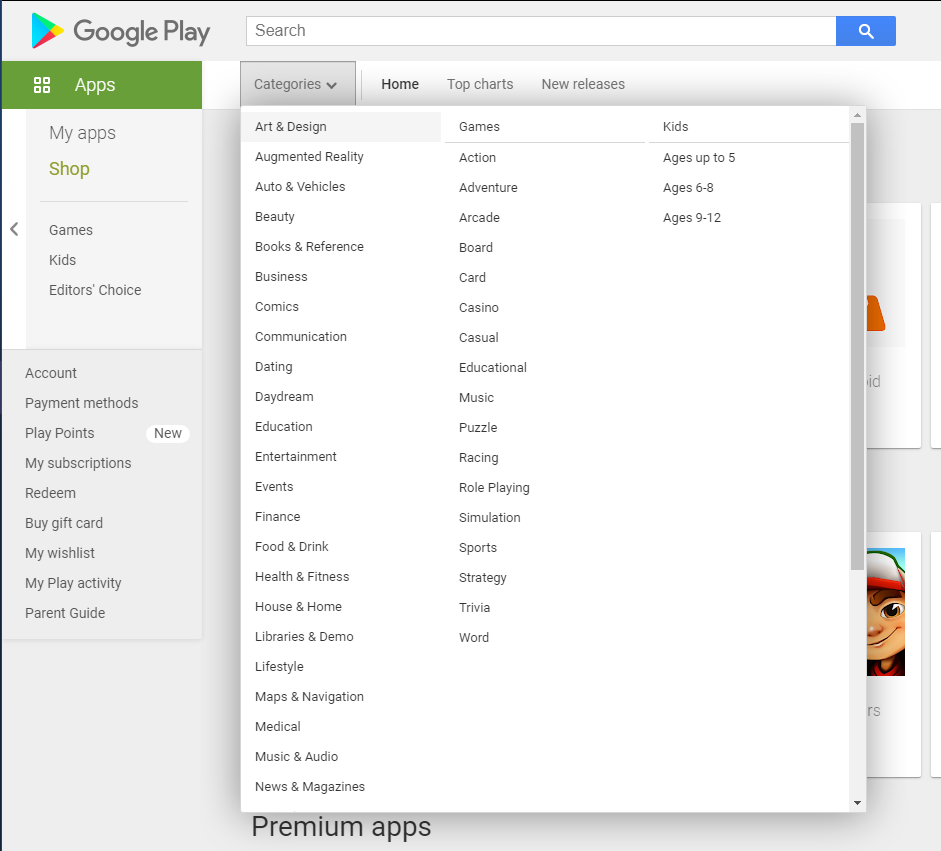

However, we do see several categories geared toward kids of different ages; a brief review of these reveals that they contain almost exclusively game apps. It seems likely that at the time our data was collection, the Family category contained predominantly kid-friendly game apps as well.

The Genres column gets more specific; here we don't see Game, but rather game types, such as Puzzle, Role Playing, and Arcade. This level of specificity splits up the larger-level genres that we're looking for, and we don't have more specific data from the Apple App Store to compare this table to, so it makes more sense to disregard it and focus on the Category table for this analysis.

As with our Apple analysis above, the large number of game and entertainment apps on the Google Play Store doesn't necessarily mean these apps have the most active users, but it does seem like these genres receive the most frequent investments from app developers. The Google Play Store also has a more even spread between its entertainment apps and more productivity-geared Tools apps.

### How Many Users?

Neither the App Store nor Google Play data sets can tell us exactly how many users open each app every day, or how much time users spend using each app. How can we use the data we have to get an idea of which genre has the most active users?

### Apple App Store Ratings

The Google Play Store has a helpful Installs column, which we can use to calculate the average number of installs for each genre; however, the App Store data does not contain the same information. The most promising data point that the Apple App Store contains is the number of user ratings each app has received. We can calculate average numbers of ratings for each app genre and compare them between the two app stores. To do that, we'll need to:

- Isolate the apps of each genre.
- Sum up the user ratings for the apps of that genre.
- Divide the sum by the number of apps belonging to that genre (not by the total number of apps).

In [23]:
#We'll start by creating a frequency table for the prime_genre App Store column
prime_genre_freq=freq_table(apple_english_free,11)
#Let's also generate a dictionary to hold our final averages, so we can sort them for printing at the end
avg_rating_count_by_genre={}
for genre in prime_genre_freq:
    #This will store the total sum of the app ratings
    ratings_sum=0
    #This will store the number of apps in the genre
    len_genre=0
    #For each app, check if the genre is our current loop's genre
    for app in apple_english_free:
        genre_app=app[11]
        if genre_app==genre:
            #If it is, save the number of ratings as a float, add it to the total sum of the app ratings,
            #and increment our number of apps in this genre
            app_ratings=float(app[5])
            ratings_sum+=app_ratings
            len_genre+=1
    #Calculate the average number of ratings in the current loop's genre
    avg_rating_count=ratings_sum/len_genre
    #Print the result
    print(str(genre)+' : '+str(avg_rating_count))

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22812.92467948718
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


In this list, we see that the highest average numbers of ratings are in the Navigation, Reference, and Social Networking genres, with 86,090, 74,942, and 71,548, respectively. Meanwhile, our Games category, which had the highest number of apps in it by far, only averages about 22,813 ratings per app. However, we also see some categories with considerably less than that in our list, bottoming out at Medical with 612. The fact that Games is still in the middle of the pack for the per-app average, and it has a much larger number of apps across which the genre's users have distributed their ratings, this indicates a fairly active level of engagement across the genre.

We should also consider the fact that Navigation, Reference, and Social Networking have some other barriers to entry:

- Navigation and Social Networking each have a small number of fairly well-established players (Google Maps, Waze; Facebook, Twitter), making it difficult to attract users away from their favorites
- Reference apps are handy when users need them, but not the type of app users turn to for fun during dull moments

With all of these things in mind, I recommend that our company develop an app for the Games category. There is enough variety here to encourage competition, and the nature of the genre pushes us to design a gamified experience that users will reach for again and again.

### Google Play Store Installs

Since the Google data set has a column showing the approximate number of installs for each app, we can use this to get a clearer idea of how popular each app, and therefore each genre, is.

This column has open-ended values that are stored as strings, such as '5,000+', '10,000+', and '50,000,000+'. We won't be able to calculate a precise average install number for each genre using these values, but if we convert the strings to numbers, we can get a good enough idea of the genres' relative popularities for our purposes.

We'll start by removing the ',' and '+' characters from the strings, and then we can calculate our averages for each genre.

In [24]:
#Generate the frequency table for the Category column
category_freq=freq_table(google_english_free,1)
#Loop through the genres in this new table
for genre in category_freq:
    #This variable will store the sum of installs in each genre
    installs_sum=0
    #This variable will store the number of apps in each genre
    len_category=0
    #Loop through the apps in our Google data set
    for app in google_english_free:
        genre_app=app[1]
        #If this app's genre is the same genre we're on in the outer loop
        if genre_app==genre:
            #Save the number of installs for this app as a variable
            app_installs=app[5]
            #Use the method str.replace() to remove any ',' characters
            app_installs=app_installs.replace(',','')
            #Remove any '+' characters
            app_installs=app_installs.replace('+','')
            #Convert this variable to a float
            app_installs=float(app_installs)
            #Add the number of installs to our installs_sum total
            installs_sum+=app_installs
            #Count this app in the len_category variable
            len_category+=1
    #Compute our average installs per app within this genre
    avg_installs=installs_sum/len_category
    #Print the genre name and the average
    print(genre+' : '+str(avg_installs))

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3697848.1731343283
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

The clear leader for installs among the Google Play Store genres is Communication, with a per-app average of about 38,456,119 installs. There are 8 other categories listed with over a million average installs: Video Players, Social, Photography, Productivity, Game, Travel and Local, Entertainment, and Tools.

### What Should We Build?

This distribution raises an interesting question for us, as we had recommended making a new game app after inspecting our Apple data set earlier. Considering this Google data shows us that the Game genre has an average of over 15 million installs per app, a new game app should be a relatively safe bet across the two platforms.

However, like the top ratings gatherer of Social Networking on the Apple App Store, here we again see a similar genre, Communication, coming out on top for installs as well. While it's true that these categories contain established favorites such as Telegram, Skype, and WhatsApp, it might be worth thinking about whether our company can generate a communication app that could break into this market. This could be more of a gamble than producing a new mobile game, but would pay off if our company can come up with an innovative and appealing communication app idea. For example, a chat and video communication app with enhanced encryption and security features might have an edge that lures users away from the larger players in the social and communication app marketplace. We could produce a platform combining the communication features of WhatsApp and Instagram Live, with a better web experience and group chat than WhatsApp and without the privacy concerns inherent in Instagram's ownership by Facebook. This is a tall order considering the in-app ads that generate our revenue traditionally rely on tracking user data, but it might be an opportunity to try a fresh new approach to advertising as well, such as having users choose their own advertising experience.

## Conclusions

In this project, we analyzed data sets of the apps in the Google Play Store and Apple App Store with the goal of recommending a genre for app development that minimizes our company's risk and overhead.

We concluded that the Games genre on both markets looks like a reasonably safe bet. However, we also considered that if we can produce a fresh and innovative platform with the potential to gain a following in the Social/Communication genre, we could tap into the largest and most active mobile app userbase.